In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# Perceptrons with a hidden layer

As you saw in the previous notebook, the perceptron + gradient descent can easily handle a linear classification task, but fails to segment things when the data is not linearly separable. In this notebook, we will see how to overcome this limitation by adding a hidden layer to the perceptron. We will also see how using a single hidden layer breaks down in practice with a practical example.

As before, we define our model in pure numpy to illustrate the learning process. We use a single hidden layer with sigmoid activations.

In [3]:
def relu(X):
	return np.maximum(X, 0)

def d_relu(X):
	return 1. * (X > 0)

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def d_sigmoid(X):
    return sigmoid(X) * (1 - sigmoid(X))


class SimpleFeedForwardNetwork():
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.bias1 = np.random.rand(hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias2 = np.random.rand(output_size)
        self.learning_rate = 0.01

    def forward(self, X):
        self.X = X
        self.Z1 = np.dot(X, self.weights1) + self.bias1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.weights2) + self.bias2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, dA):
        dZ2 = dA * d_sigmoid(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0)
        dA1 = np.dot(dZ2, self.weights2.T)
        dZ1 = dA1 * d_sigmoid(self.Z1)
        dW1 = np.dot(self.X.T, dZ1)
        db1 = np.sum(dZ1, axis=0)
        self.weights2 -= self.learning_rate * dW2
        self.bias2 -= self.learning_rate * db2
        self.weights1 -= self.learning_rate * dW1
        self.bias1 -= self.learning_rate * db1
        return dA1

    def train(self, X, y, epochs):
        self.loss = []
        for i in range(epochs):
            A = self.forward(X)
            loss = np.sum((A - y) ** 2)
            dA = 2 * (A - y)
            self.backward(dA)
            self.loss.append(loss)

# Starting where we left off

We use the same dataset that the perceptron failed to classify in the previous notebook. We will see how adding a hidden layer can help us classify this data. 

[]

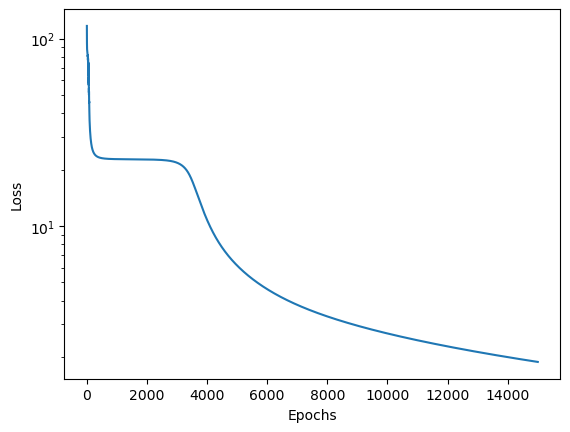

In [4]:
X = np.random.rand(500, 2)
y = np.zeros((500, 1))

# Make the classication problem a bit harder
y[X[:, 0] > 0.5] = 1
y[X[:, 1] > 0.5] = 1 

model = SimpleFeedForwardNetwork(2, 8, 1)
model.train(X, y, 15000)

plt.plot(model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.semilogy()

/tmp/ipykernel_3221013/183833177.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ZZ[i, j] = model.forward(np.array([[XX[i, j], YY[i, j]]]))


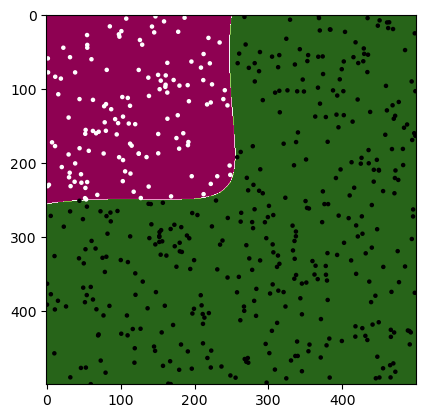

In [5]:
# Plot the decision boundary
xx = np.linspace(0, 1, 500)
yy = np.linspace(0, 1, 500)
XX, YY = np.meshgrid(xx, yy)
ZZ = np.zeros(XX.shape)
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        ZZ[i, j] = model.forward(np.array([[XX[i, j], YY[i, j]]]))

fig, ax = plt.subplots()
ax.imshow(ZZ>0.5, cmap='PiYG')
ax.scatter(500* X[:, 0], 500 * X[:, 1], c=y[:, 0], cmap='bone_r', s=5)

#  Nice! We were able to classify the data using a single hidden layer.

That's really promising to see, but we should be a bit critical here. Note for one thing that our boundary is stil quite smooth and almost seems to overfit the data on/near the boundaries. This highlights how very simple neural networks can illustrate important concepts. Anyhow, let's move on to an even more complex problem.

This one requires a decision boundary that is not only non-linear, but also has a hole in the middle. Let's see how our single hidden layer perceptron does on this one.

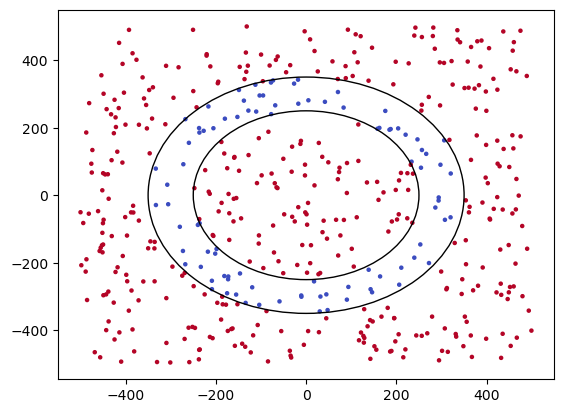

In [6]:
X = 2 * (np.random.rand(500, 2) - 0.5)

# classify y as 0 if it has radius smaller than 0.5 and or larger than 0.7
y = np.zeros((500, 1))
y[np.linalg.norm(X, axis=1) < 0.5] = 1
y[np.linalg.norm(X, axis=1) > 0.7] = 1

fig, ax = plt.subplots()
ax.scatter(500 * X[:, 0], 500 * X[:, 1], c=y[:, 0], cmap='coolwarm', s=5)
circle = plt.Circle((0, 0), 500* 0.5, color='black', fill=False)
ax.add_artist(circle)
circle = plt.Circle((0, 0), 500 * 0.7, color='black', fill=False)
ax.add_artist(circle)

In [7]:
model = SimpleFeedForwardNetwork(2, 8, 1)
model.train(X, y, 25000)

[]

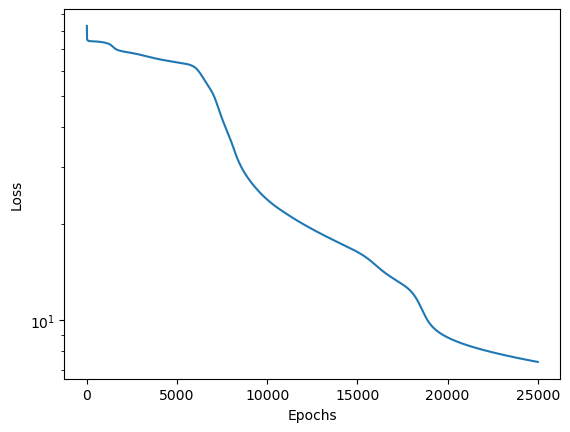

In [8]:
plt.plot(model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.semilogy()

/tmp/ipykernel_3221013/1484669977.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ZZ[i, j] = model.forward(np.array([[XX[i, j], YY[i, j]]]))


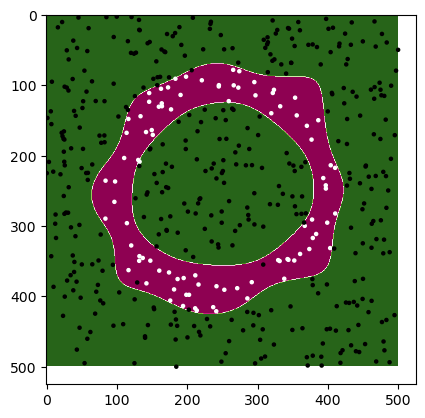

In [9]:
# Plot the decision boundary
xx = np.linspace(-1, 1, 500)
yy = np.linspace(-1, 1, 500)
XX, YY = np.meshgrid(xx, yy)
ZZ = np.zeros(XX.shape)
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        ZZ[i, j] = model.forward(np.array([[XX[i, j], YY[i, j]]]))

fig, ax = plt.subplots()
ax.imshow(ZZ>0.5, cmap='PiYG')
ax.scatter(250* (X[:, 0]+1), 250* (X[:, 1]+1), c=y[:, 0], cmap='bone_r', s=5)

#  Wow! The model worked quite well

Not only were we able to make the model fit a non-linear decision boundary, but we were also able to make it fit a decision boundary with a hole in the middle. This is a great example of how adding a hidden layer can help us classify data that is not linearly separable.

The decision boundary is a bit wobbly and has some blobs in sparser areas of the data, but clearly is better than the basic perceptron.

# Onto another harder problem

So now let's move onto another harder problem where we add a ball in the center of the ring and see how our model performs. As you may expect, this one will confound our simple model. Let's see...

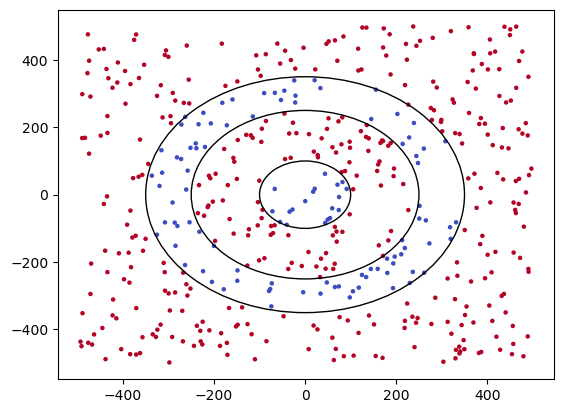

In [10]:
X = 2 * (np.random.rand(500, 2) - 0.5)

# classify y as 0 if it has radius smaller than 0.5 and or larger than 0.7
y = np.zeros((500, 1))
y[np.linalg.norm(X, axis=1) < 0.5] = 1
y[np.linalg.norm(X, axis=1) > 0.7] = 1
y[np.linalg.norm(X, axis=1) < 0.2] = 0

fig, ax = plt.subplots()
ax.scatter(500 * X[:, 0], 500 * X[:, 1], c=y[:, 0], cmap='coolwarm', s=5)
circle = plt.Circle((0, 0), 500* 0.5, color='black', fill=False)
ax.add_artist(circle)
circle = plt.Circle((0, 0), 500 * 0.7, color='black', fill=False)
ax.add_artist(circle)
circle = plt.Circle((0, 0), 500 * 0.2, color='black', fill=False)
ax.add_artist(circle)

[]

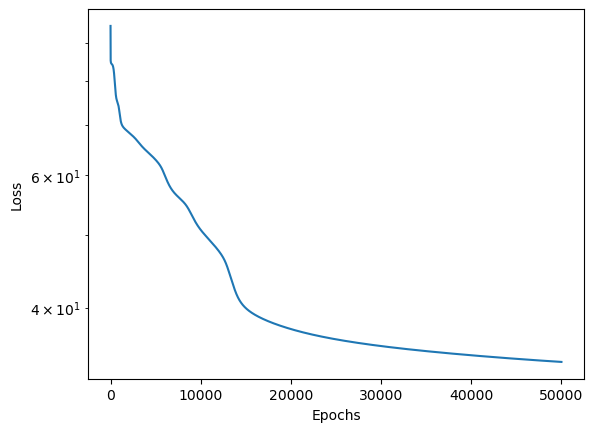

In [11]:
model = SimpleFeedForwardNetwork(2, 8, 1)
model.train(X, y, 50000)

plt.plot(model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.semilogy()

/tmp/ipykernel_3221013/1484669977.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ZZ[i, j] = model.forward(np.array([[XX[i, j], YY[i, j]]]))


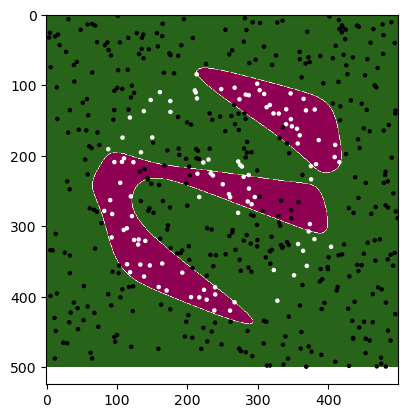

In [12]:
# Plot the decision boundary
xx = np.linspace(-1, 1, 500)
yy = np.linspace(-1, 1, 500)
XX, YY = np.meshgrid(xx, yy)
ZZ = np.zeros(XX.shape)
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        ZZ[i, j] = model.forward(np.array([[XX[i, j], YY[i, j]]]))

fig, ax = plt.subplots()
ax.imshow(ZZ>0.5, cmap='PiYG')
ax.scatter(250* (X[:, 0]+1), 250* (X[:, 1]+1), c=y[:, 0], cmap='bone_r', s=5)

# Well... that didn't work

As you can see, the model did not do a great job of finding the disjoint decision boundary. This is a fundamental limitation of using a single hidden layer. If you want to see how adding layers can help us classify this data, check out the next notebook.